<a href="https://colab.research.google.com/github/Skylee0310/KDT_PYTHON/blob/main/COLAB/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import seaborn as sns

In [38]:
df = sns.load_dataset('titanic')

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [42]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [43]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
df.drop('deck', axis=1, inplace=True)

In [45]:
#df.drop('embarked', axis=1, inplace=True)

In [46]:
df.drop(['embarked', 'embark_town'], axis=1, inplace=True)

In [47]:
#df.drop('embark_town', axis=1, inplace=True)

In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True


In [49]:
mean_age = df['age'].mean()

In [50]:
df['age'].fillna(mean_age, inplace = True)

In [51]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [52]:
df['Companion']=df['sibsp']+df['parch']

In [53]:
df['alone'] = (df['Companion']==0).astype(int)

In [54]:
df['Survived_cat'] = df['survived'].map({1:'Survived', 0:'Not Survived'})

In [55]:
dummy_titanic = pd.get_dummies(df['alone'], prefix='Alone')
df = pd.concat([df, dummy_titanic], axis=1)


In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,Companion,Survived_cat,Alone_0,Alone_1
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,0,1,Not Survived,True,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,0,1,Survived,True,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,1,0,Survived,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,0,1,Survived,True,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,1,0,Not Survived,False,True


In [57]:
# 가설 1 검증
survival_rates = df.groupby('alone')['survived'].mean() # 그룹화 하여 생존율 확인. alone이 0일 때 survived인 비율 vs alone이 1일때 survived인 비율

In [58]:
survival_rates

alone
0    0.505650
1    0.303538
Name: survived, dtype: float64

- alone = 0 혼자가 아닐 때 생존율 0.5
- alone = 1 혼자 일 때 생존율 0.3
- => 동반자가 있을때 생존율이 더 높았다.

In [59]:
# 가설 2 : 나이대별로 승객의 생존률은 차이가 난다

In [60]:
age_bin = [0, 12, 18, 30, 50, float('inf')] # float('inf') : 무한대, 여기서는 50 이상의 값을 포함
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['age'], bins = age_bin, labels = age_labels, right = False) # 구간을 왼쪽을 포함하고 오른쪽은 포함하지 않는 방식으로 설정

In [61]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,Companion,Survived_cat,Alone_0,Alone_1,AgeGroup
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,no,0,1,Not Survived,True,False,Young Adult
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,yes,0,1,Survived,True,False,Adult
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,yes,1,0,Survived,False,True,Young Adult
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,yes,0,1,Survived,True,False,Adult
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,no,1,0,Not Survived,False,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,man,True,no,1,0,Not Survived,False,True,Young Adult
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,yes,1,0,Survived,False,True,Young Adult
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,no,0,3,Not Survived,True,False,Young Adult
889,1,1,male,26.000000,0,0,30.0000,First,man,True,yes,1,0,Survived,False,True,Young Adult


In [62]:
# 가설2 검증
survival_rates = df.groupby('AgeGroup')['survived'].mean() # AgeGroup에 따른 생존율
survival_rates # 나이 구간에 따라 따라 생존율 차이가 있다.

AgeGroup
Child          0.573529
Teenager       0.488889
Young Adult    0.328125
Adult          0.417969
Senior         0.364865
Name: survived, dtype: float64

In [63]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
#help(LabelEncoder())
df['class']=le.fit_transform(df['class'])
df['sex'] =le.fit_transform(df['sex'])

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
X = df[['sex', 'class', 'age']]
y = df['survived']

In [71]:
#help(train_test_split)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)
#y_pred

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

In [88]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터를 표준화
df['age'] = scaler.fit_transform(df[['age']])

df['age']

0     -0.592481
1      0.638789
2     -0.284663
3      0.407926
4      0.407926
         ...   
886   -0.207709
887   -0.823344
888    0.000000
889   -0.284663
890    0.177063
Name: age, Length: 891, dtype: float64

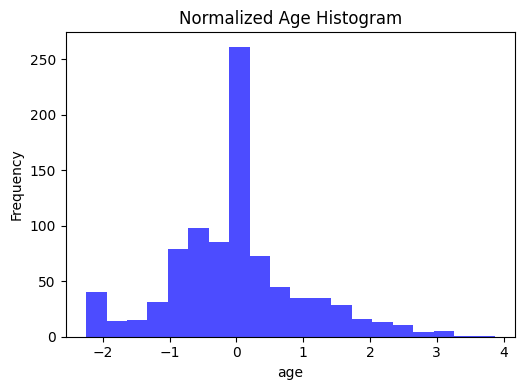

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['age'], bins = 20, color ='blue', alpha=0.7)
plt.title('Normalized Age Histogram')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler
MScaler = MinMaxScaler()
df['fare'] =  MScaler.fit_transform(df[['fare']])

In [93]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,Companion,Survived_cat,Alone_0,Alone_1,AgeGroup
0,0,3,1,-0.592481,1,0,0.014151,2,man,True,no,0,1,Not Survived,True,False,Young Adult
1,1,1,0,0.638789,1,0,0.139136,0,woman,False,yes,0,1,Survived,True,False,Adult
2,1,3,0,-0.284663,0,0,0.015469,2,woman,False,yes,1,0,Survived,False,True,Young Adult
3,1,1,0,0.407926,1,0,0.103644,0,woman,False,yes,0,1,Survived,True,False,Adult
4,0,3,1,0.407926,0,0,0.015713,2,man,True,no,1,0,Not Survived,False,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,0,0,0.025374,1,man,True,no,1,0,Not Survived,False,True,Young Adult
887,1,1,0,-0.823344,0,0,0.058556,0,woman,False,yes,1,0,Survived,False,True,Young Adult
888,0,3,0,0.000000,1,2,0.045771,2,woman,False,no,0,3,Not Survived,True,False,Young Adult
889,1,1,1,-0.284663,0,0,0.058556,0,man,True,yes,1,0,Survived,False,True,Young Adult
